# Mandril
The mandril algorithm is a merging of maxent and maml.

### Imports

In [1]:
import utils
from agent import Agent
import solver as Solver
from maml import maml

import numpy as np
import matplotlib.pyplot as plt
import time

### Parameters

In [2]:
size = 8
p_slip = 0.0
N = 10000
batch_size = 20
meta_lr = 0.1

### Run Mandril

In [3]:
startTime = time.time()
theta, validation_scores, reg_scores = \
    maml(N, batch_size, meta_lr, size, p_slip)
executionTime = (time.time() - startTime)

In [4]:
print("Run time: {0}".format(executionTime))
print('Theta: {0}'.format(theta))
print("mean validations per tenths:")
print([np.round(np.mean(validation_scores[int(N / 10) * i :
    int(N / 10) * (i + 1)]), 2) for i in range(10)])
print("Regular maxent:")
print([np.round(np.mean(reg_scores[int(N / 10) * i :
    int(N / 10) * (i + 1)]), 2) for i in range(10)])
print('Total execution time: {0} (sec)'.format(executionTime))

Run time: 16815.02583217621
Theta: [9.38840178e-11 9.68408216e-11 5.77394100e-12 6.24566833e-13
 4.58067114e-13 2.02558168e-12 1.73772999e-11 1.70696590e-08
 8.21906038e-11 5.79645537e-10 2.67638980e-11 9.40179299e-13
 2.18554951e-13 3.30850371e-13 2.21476566e-12 1.08560509e-03
 2.91456188e-12 3.51765681e-11 2.97487117e-13 3.94675417e-16
 4.19828628e-18 3.01757670e-19 3.29708356e-19 5.96695238e-02
 3.05152410e-13 6.62461541e-13 2.04962733e-16 3.88758650e-21
 4.79725791e-25 7.35074289e-29 9.61015508e-31 5.87666893e-02
 3.50953094e-13 2.47698364e-13 3.48018573e-18 9.84279024e-26
 2.26125809e-33 2.44045453e-41 6.61314833e-47 1.10676730e-02
 1.38409295e-12 2.35931027e-13 5.17005122e-19 6.30393001e-29
 6.69151911e-41 9.45196424e-56 8.88592739e-70 4.45689468e-16
 1.71260372e-11 2.20710860e-12 3.85358407e-19 3.45681087e-31
 4.96207503e-47 6.21776097e-70 4.44466785e-96 1.40725621e-41
 1.77403227e-08 6.22167290e-04 7.19125707e-02 8.43566118e-02
 1.88126041e-02 1.74403110e-15 2.24514341e-40 6.93

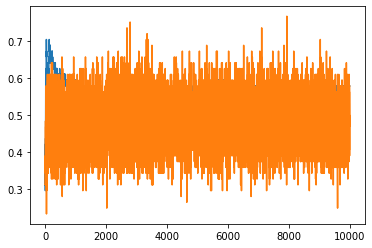

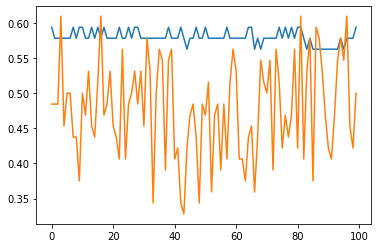

In [5]:
plt.plot(range(N), validation_scores, reg_scores)
plt.show()
K = 100
L = 800
plt.plot(range(K), validation_scores[L:L+K], reg_scores[L:L+K])
plt.show()
